In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

# Path to the saved model
model_path = '/content/drive/MyDrive/Models/fruits_and_vegetables_recognition_model'

# Load the model
model = tf.keras.models.load_model(model_path)

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.96G/1.98G [00:19<00:00, 143MB/s]
100% 1.98G/1.98G [00:19<00:00, 108MB/s]


In [ ]:
! unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

Found 359 files belonging to 36 classes.


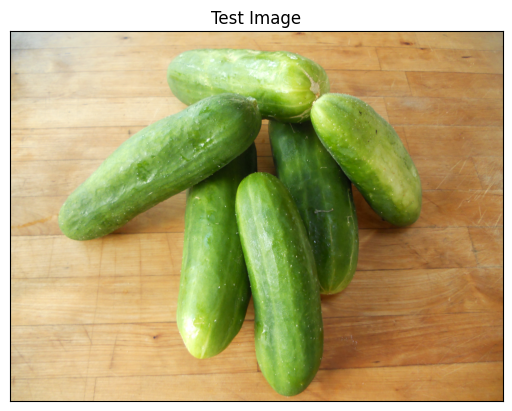

1/1 [==============================] - 0s 279ms/step
10


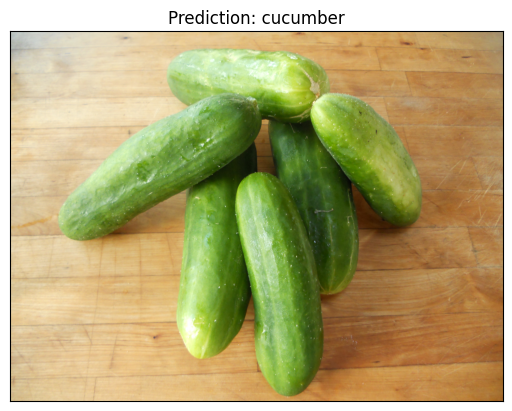

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

#Test Image Visualization
import cv2
image_path = '/content/test/cucumber/Image_10.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

result_index = np.argmax(predictions) #Return index of max element
print(result_index)


# Displaying the image and predicting
plt.imshow(img)
plt.title(f"Prediction: {test_set.class_names[result_index]}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/train"
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(64, 64),
    class_mode="categorical",
    seed=42
)

# Get the class names
class_names = list(train_data.class_indices.keys())
print("Class names:", class_names)

Found 3115 images belonging to 36 classes.
Class names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [ ]:
# Function to preprocess image from URL
def load_and_prep_image_from_url(img_url, target_size=(64, 64)):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img = img.convert('RGB')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale pixel values
    return img_array, img

# Predict and display the result
def pred_and_plot_from_url(model, img_url, class_names):
    img_array, img = load_and_prep_image_from_url(img_url)
    predictions = model.predict(img_array)
    result_index = np.argmax(predictions) # Return index of max element

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Prediction: {class_names[result_index]}")
    plt.xticks([])
    plt.yticks([])
    plt.show()

1/1 [==============================] - 0s 36ms/step


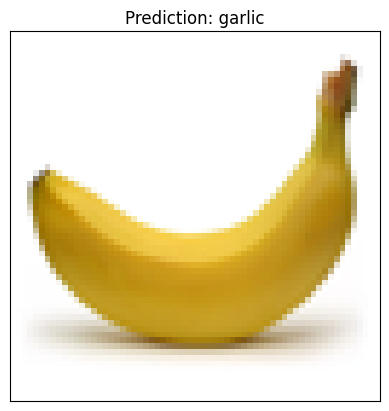

In [ ]:
# Example image URL (update this with your image URL)
example_image_url = 'https://images.freeimages.com/images/large-previews/360/banana-1-1330048.jpg?fmt=webp&w=500'

# Make a prediction and plot the result
pred_and_plot_from_url(model, example_image_url, class_names)

1/1 [==============================] - 0s 41ms/step


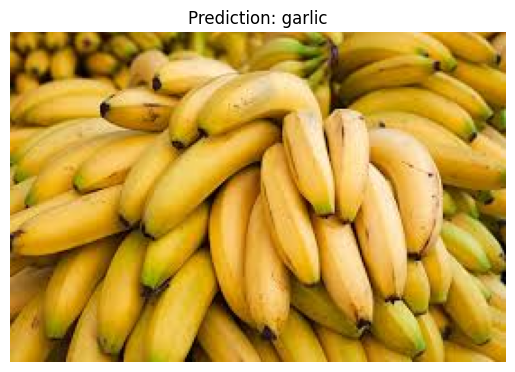

In [ ]:
# Function to preprocess image from URL
def load_and_prep_image_from_url(img_url, target_size=(64, 64)):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale pixel values
    return img_array, img

# Predict and display the result
def pred_and_plot_from_url(model, img_url, class_names):
    img_array, img = load_and_prep_image_from_url(img_url)
    predictions = model.predict(img_array)
    result_index = np.argmax(predictions) # Return index of max element

    # Plotting the original image for better clarity
    original_img = Image.open(BytesIO(requests.get(img_url).content))
    plt.imshow(original_img)
    plt.title(f"Prediction: {class_names[result_index]}")
    plt.axis('off')  # Hide axes
    plt.show()

# Example image URL (update this with your image URL)
example_image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSoqx0DYLQs9Jswk05wgxb3G0525mvxKv0vBQ&s'

# Make a prediction and plot the result
pred_and_plot_from_url(model, example_image_url, class_names)
